### Exp-11: K-Nearest Neighbours for binary classification
- (a) KNN for machine fault detection
- (b) KNN for Cardiovascular disease detection

- Evaluation is done by confusion matrix: for binary classification
- confusion matrix order: 2*2
- True postive -(0,0)
- True negative-(0,1)
- False positive-(1,0)
- True negative-(1,1)


In [106]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [107]:
x1=[60,85,115,216,129]
x2=[85,129,145,201,99]
y=[0,0,1,1,0]
col=['x1','x2','y']
df=pd.DataFrame(columns=col)
data = {'x1': x1, 'x2': x2, 'y': y}
df=pd.DataFrame(data)

In [108]:
df

,x1,x2,y
0,60,85,0
1,85,129,0
2,115,145,1
3,216,201,1
4,129,99,0


In [109]:
l=np.array([75,162])
df['distance'] = np.linalg.norm(df[['x1', 'x2']].values - l, axis=1)

In [110]:
df

,x1,x2,y,distance
0,60,85,0,78.447435
1,85,129,0,34.481879
2,115,145,1,43.462628
3,216,201,1,146.294224
4,129,99,0,82.975900


In [111]:
df['rank'] = df['distance'].rank(method='min', ascending=True).astype(int) 

In [112]:
df

,x1,x2,y,distance,rank
0,60,85,0,78.447435,3
1,85,129,0,34.481879,1
2,115,145,1,43.462628,2
3,216,201,1,146.294224,5
4,129,99,0,82.975900,4


In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
#Normalisation

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler=MinMaxScaler()

In [117]:
data1=np.random.randint(60,300,size=(10000,1)) #Blood glucose
data2=np.random.randint(60,200,size=(10000,1))#Blood Pressure

In [118]:
features=np.concatenate((data1,data2),axis=1)
print(features.shape)
label=np.random.randint(0,2,size=(10000,1))

(10000, 2)


In [119]:
Xtransform=scaler.fit_transform(features)

In [120]:
Xtransform.shape

(10000, 2)

In [121]:
Xtrain=Xtransform[:6000,:]
Xval=Xtransform[6000:8000,:]
Xtest=Xtransform[8000:,:]

In [122]:
trainLabel=label[:6000,:]
valLabel=label[6000:8000,:]
testLabel=label[8000:,:]

### Train KNN for different values of k

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
k=np.arange(1,20,1)
train_score=[]
for i in k:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(Xtrain,trainLabel)
    #validation accuracy>training accuracy: testing
    train_score.append(model.score(Xtrain,trainLabel))
    

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [125]:
train_score

[0.96,
 0.752,
 0.7515,
 0.6843333333333333,
 0.6888333333333333,
 0.6623333333333333,
 0.6633333333333333,
 0.6396666666666667,
 0.6341666666666667,
 0.6256666666666667,
 0.6208333333333333,
 0.6131666666666666,
 0.6028333333333333,
 0.5975,
 0.596,
 0.5923333333333334,
 0.5876666666666667,
 0.5868333333333333,
 0.5846666666666667]

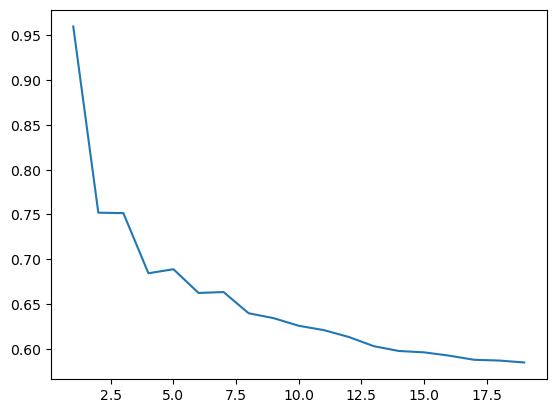

In [126]:
import matplotlib.pyplot as plt
plt.plot(k,train_score)

In [127]:
k=np.arange(1,20,1)
val_score=[]
for i in k:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(Xval,valLabel)
    #validation accuracy>training accuracy: testing
    val_score.append(model.score(Xval,valLabel))

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [128]:
val_score

[0.989,
 0.745,
 0.751,
 0.6875,
 0.6775,
 0.657,
 0.648,
 0.6265,
 0.628,
 0.6215,
 0.6265,
 0.6115,
 0.607,
 0.591,
 0.593,
 0.5895,
 0.6005,
 0.601,
 0.5965]

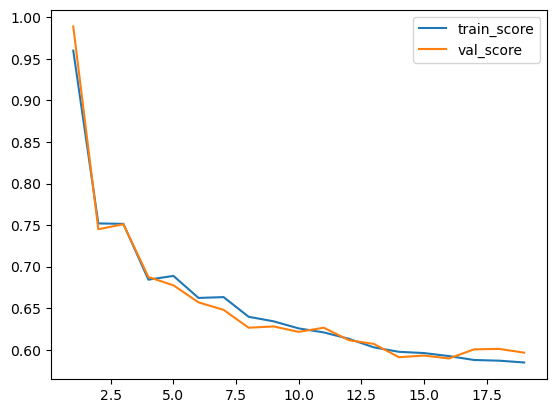

In [129]:
import matplotlib.pyplot as plt
plt.plot(k,train_score,label="train_score")
plt.plot(k,val_score,label="val_score")
plt.legend()

In [130]:
#Prediction

In [133]:
model_selected=KNeighborsClassifier(n_neighbors=2)
model_selected=model_selected.fit(Xtrain,trainLabel)
labelPredicted=model.predict(Xtest)
from sklearn.metrics import confusion_matrix
l=confusion_matrix(testLabel,labelPredicted)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [132]:
#accuracy=TP+TN/sum of all

In [154]:
l

array([[482, 479],
       [490, 549]], dtype=int64)

In [153]:
l[0][0]

482

In [155]:
l[0][1]

479

In [156]:
l[1][0]

490

In [157]:
l[1][1]

549

In [158]:
a=(l[0][0]+l[1][1])/(l.sum())

In [160]:
a*100

51.55

In [149]:
accuracy=(482+549)/(482+549+490+479)

In [150]:
accuracy

0.5155

#### (a) KNN for machine fault detection

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df1=pd.read_csv("D:\\SEM 3\Python for Data Science\\predictive_maintenance.csv")

In [3]:
df1.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df1['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [5]:
df1['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [6]:
df1=pd.get_dummies(df1, columns=['Type'])

In [7]:
df1

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,No Failure,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,298.8,308.4,1604,29.5,14,0,No Failure,0,0,1
9996,9997,H39410,298.9,308.4,1632,31.8,17,0,No Failure,1,0,0
9997,9998,M24857,299.0,308.6,1645,33.4,22,0,No Failure,0,0,1
9998,9999,H39412,299.0,308.7,1408,48.5,25,0,No Failure,1,0,0


In [8]:
X=df1[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y=df1['Target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy: 0.97
Precision: 0.75
Recall: 0.16
F1-score: 0.27
Confusion Matrix:
[[2902    5]
 [  78   15]]


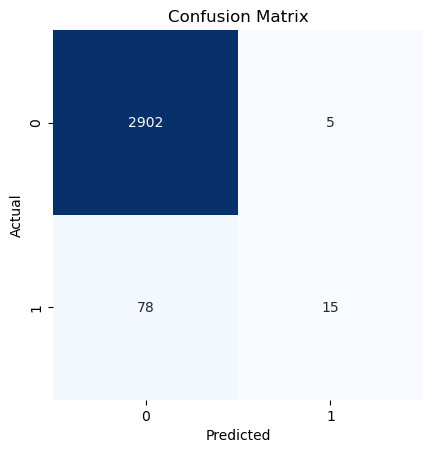

In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

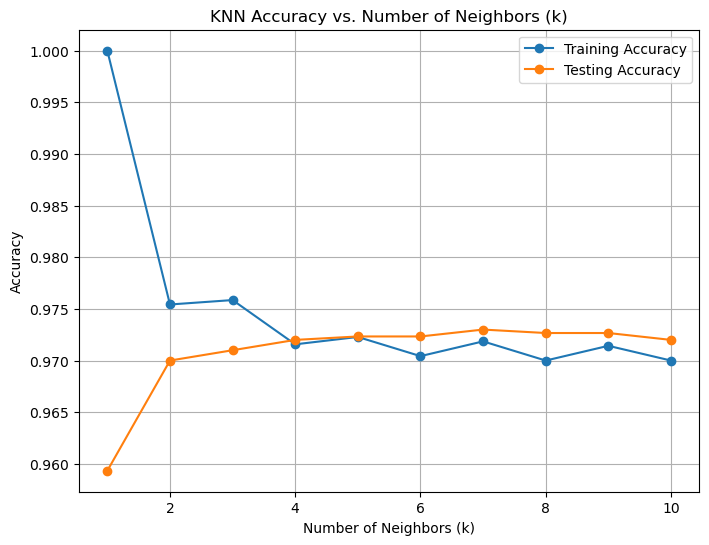

In [12]:
k_values = range(1, 11)
train_accuracy_values = []
test_accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)


plt.figure(figsize=(8, 6))
plt.plot(k_values, train_accuracy_values, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracy_values, label='Testing Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
model_path = 'D:\\SEM 3\\PDS Journal\\knn_model.joblib'

joblib.dump(knn, model_path)

['D:\\SEM 3\\PDS Journal\\knn_model.joblib']

#### (b) KNN for Cardiovascular disease detection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\SEM 3\Python for Data Science\\heart_data.csv")

In [3]:
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


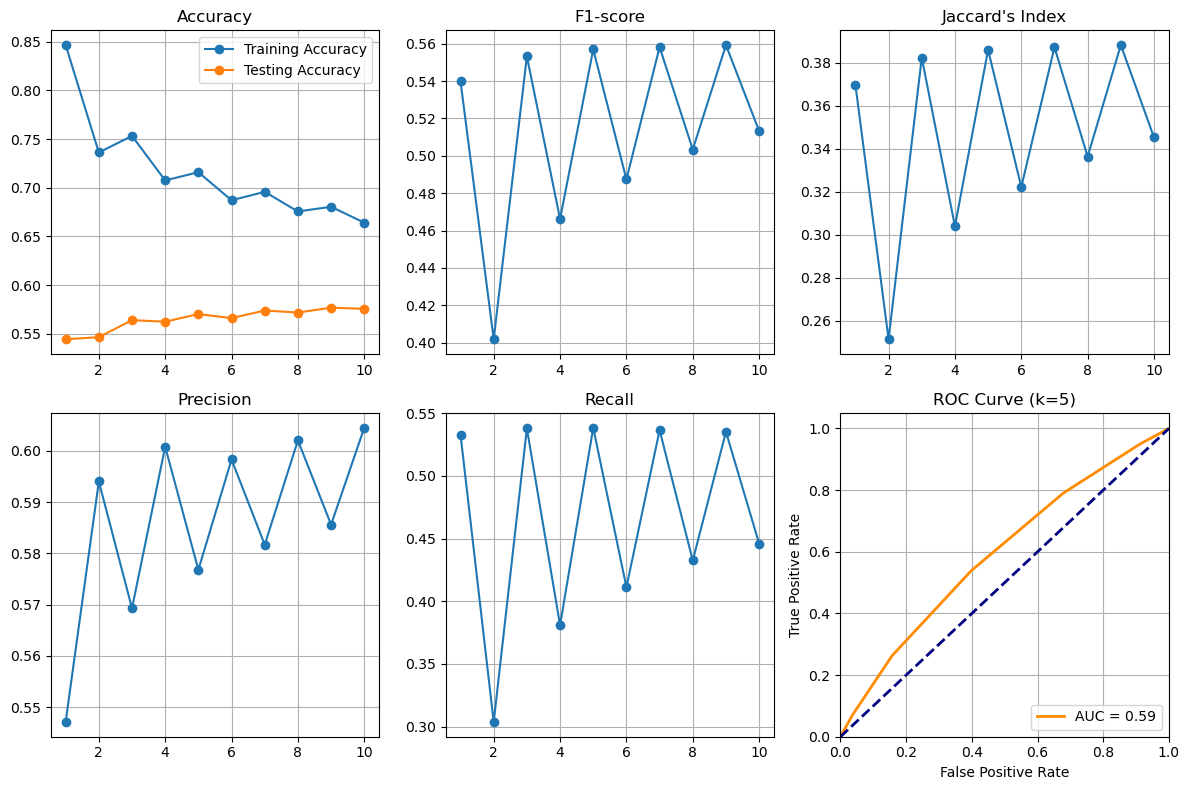

In [75]:
X = df[['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].values
y = df['cardio'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 11)
train_accuracy_values = []
test_accuracy_values = []
f1_values = []
jaccard_values = []
precision_values = []
recall_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    jaccard = jaccard_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    

    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    f1_values.append(f1)
    jaccard_values.append(jaccard)
    precision_values.append(precision)
    recall_values.append(recall)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(k_values, train_accuracy_values, marker='o', label='Training Accuracy')
plt.plot(k_values, test_accuracy_values, marker='o', label='Testing Accuracy')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(k_values, f1_values, marker='o')
plt.title('F1-score')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(k_values, jaccard_values, marker='o')
plt.title("Jaccard's Index")
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(k_values, precision_values, marker='o')
plt.title('Precision')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(k_values, recall_values, marker='o')
plt.title('Recall')
plt.grid(True)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.subplot(2, 3, 6)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (k=5)')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()